### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
suma_tienda = tienda['Precio'].sum()
suma_tienda2 = tienda2['Precio'].sum()
suma_tienda3 = tienda3['Precio'].sum()
suma_tienda4 = tienda4['Precio'].sum()

for i in [suma_tienda, suma_tienda2, suma_tienda3, suma_tienda4]:
  print(i)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


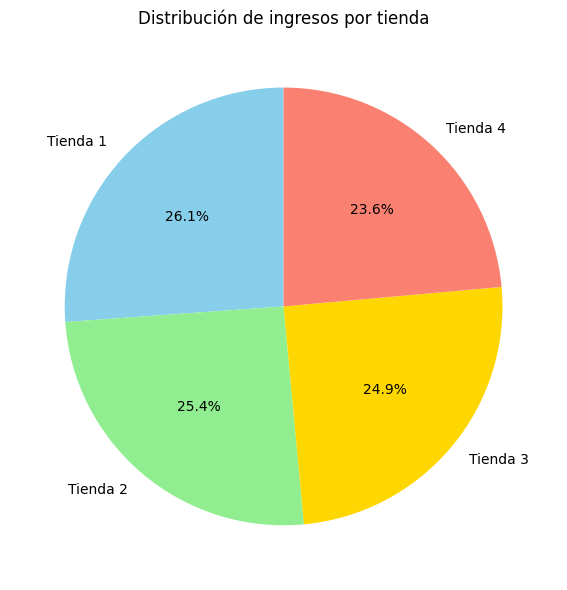

In [7]:
import matplotlib.pyplot as plt

# Ingresos totales (valores ya calculados)
ingresos = [suma_tienda, suma_tienda2, suma_tienda3, suma_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Pie Chart: distribución de ingresos por tienda
plt.figure(figsize=(6, 6))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.title("Distribución de ingresos por tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [15]:
# Tienda 1
productop_tienda = (
    tienda
    .groupby('Producto')['Categoría del Producto']
    .agg([
        ('categoria_mas_frecuente', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
        ('cantidad_vendida', 'count')
    ])
    .reset_index()
)
producto_top = productop_tienda.sort_values('cantidad_vendida', ascending=False).head(1)
print("Tienda 1:")
print(producto_top)

# Tienda 2
productop_tienda2 = (
    tienda2
    .groupby('Producto')['Categoría del Producto']
    .agg([
        ('categoria_mas_frecuente', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
        ('cantidad_vendida', 'count')
    ])
    .reset_index()
)
producto_top2 = productop_tienda2.sort_values('cantidad_vendida', ascending=False).head(1)
print("Tienda 2:")
print(producto_top2)

# Tienda 3
productop_tienda3 = (
    tienda3
    .groupby('Producto')['Categoría del Producto']
    .agg([
        ('categoria_mas_frecuente', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
        ('cantidad_vendida', 'count')
    ])
    .reset_index()
)
producto_top3 = productop_tienda3.sort_values('cantidad_vendida', ascending=False).head(1)
print("Tienda 3:")
print(producto_top3)

# Tienda 4
productop_tienda4 = (
    tienda4
    .groupby('Producto')['Categoría del Producto']
    .agg([
        ('categoria_mas_frecuente', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
        ('cantidad_vendida', 'count')
    ])
    .reset_index()
)
producto_top4 = productop_tienda4.sort_values('cantidad_vendida', ascending=False).head(1)
print("Tienda 4:")
print(producto_top4)

Tienda 1:
  Producto categoria_mas_frecuente  cantidad_vendida
1  Armario                 Muebles                60
Tienda 2:
                     Producto categoria_mas_frecuente  cantidad_vendida
24  Iniciando en programación                  Libros                65
Tienda 3:
         Producto categoria_mas_frecuente  cantidad_vendida
27  Kit de bancas                 Muebles                57
Tienda 4:
    Producto categoria_mas_frecuente  cantidad_vendida
10  Cama box                 Muebles                62


# 3. Calificación promedio de la tienda


In [8]:
promedio_tienda = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

calificaciones = [promedio_tienda, promedio_tienda2, promedio_tienda3, promedio_tienda4]

for i in calificaciones:
  print(i)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


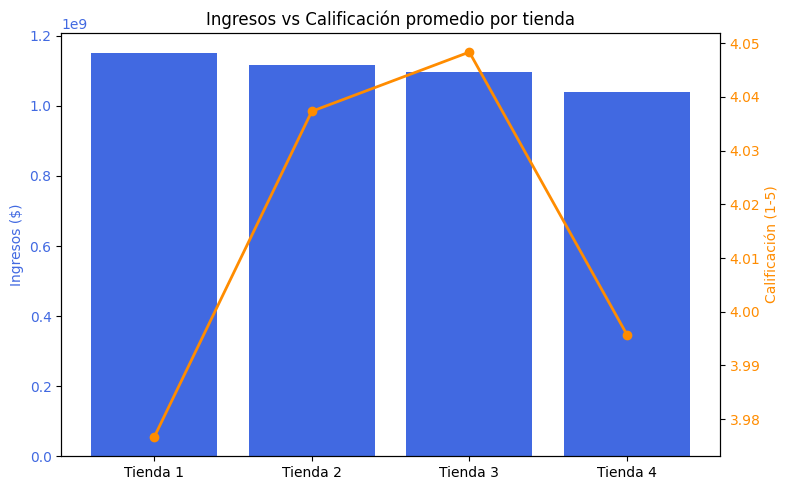

In [10]:
# Gráfico combinado: Ingresos (barras) + Calificación promedio (línea)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eje 1: Ingresos por tienda (columnas)
ax1.bar(tiendas, ingresos, color='royalblue', label='Ingresos')
ax1.set_ylabel('Ingresos ($)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Eje 2: Calificación promedio (línea)
ax2 = ax1.twinx()
ax2.plot(tiendas, calificaciones, color='darkorange', marker='o', linewidth=2, label='Calificación promedio')
ax2.set_ylabel('Calificación (1-5)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Título y presentación
plt.title("Ingresos vs Calificación promedio por tienda")
fig.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

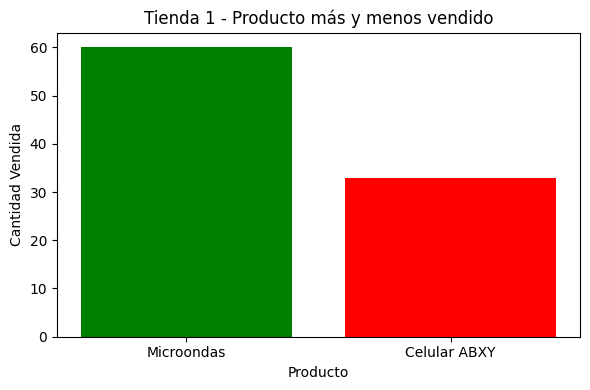

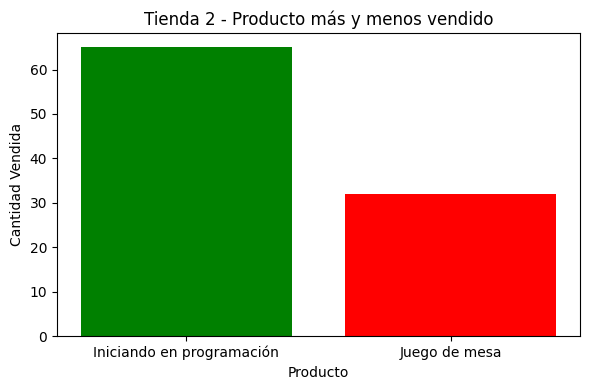

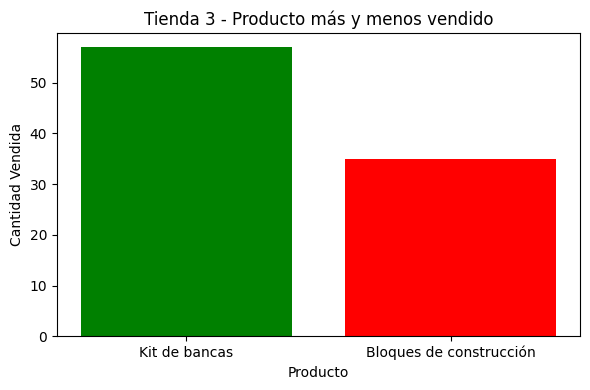

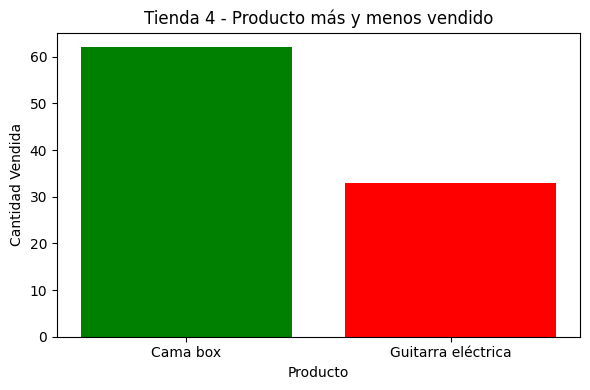

In [11]:
import matplotlib.pyplot as plt

# URLs de las tiendas
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Procesar cada tienda
for nombre_tienda, url in urls.items():
    tienda = pd.read_csv(url)

    # Contar cuántas veces se vendió cada producto
    conteo = tienda['Producto'].value_counts().reset_index()
    conteo.columns = ['Producto', 'Cantidad_Vendida']

    # Obtener producto más vendido y menos vendido
    mas_vendido = conteo.iloc[0]  # ya está ordenado por defecto
    menos_vendido = conteo.iloc[-1]

    # Crear DataFrame para graficar
    extremos = pd.DataFrame({
        'Producto': [mas_vendido['Producto'], menos_vendido['Producto']],
        'Cantidad Vendida': [mas_vendido['Cantidad_Vendida'], menos_vendido['Cantidad_Vendida']]
    })

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.bar(extremos['Producto'], extremos['Cantidad Vendida'], color=['green', 'red'])
    plt.title(f'{nombre_tienda} - Producto más y menos vendido')
    plt.ylabel('Cantidad Vendida')
    plt.xlabel('Producto')
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [19]:
Costo_Envio_promedio_tienda = tienda['Costo de envío'].mean()
Costo_Envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
Costo_Envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
Costo_Envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

for i in [Costo_Envio_promedio_tienda,Costo_Envio_promedio_tienda2,Costo_Envio_promedio_tienda3,Costo_Envio_promedio_tienda4]:
  print(i)

23459.457167090754
25216.235693090293
24805.680373039424
23459.457167090754


**Informe Final**

El objetivo del siguiente informe es determinar cuál de las tiendas el Sr. Juan debería vender, tomando en consideración factoires de rendimiento, categorías, la calificación de satisfacción promedio de los clientes, y el costo de envío promedio por tienda, haciendo que está sea menos fuerte.

Dentro de los ingresos totales, la tienda 3 fue la que tuvo mayores ingresos, seguidos de la tienda 1, en este renglón la tienda 4 fue la que menor evidencia de esto tuvo. Debtro de las categorías cada tienda mostró una fuerte rotación hacia algún producto, esto fue díficil de identificar en la tienda 4 porque mostró una demanda baja, sin una categoría dominante clara.

Dentro de los costos de envío la tienda 2 y 3 tuvieron costos de envío mas altos mientras que la tienda 1 y 4 presentaron una debilidad en logística, sin embargo, la suma de ingresos de la tienda 1 es la mayor entre todos.

La tienda que se debería cerra o prescindir, es la tienda 4.